In [1]:
from IPython.core.display import display, HTML
display(HTML(
"""<style>
div.container { width:100% !important; }
div.CodeMirror {font-family: Consolas; font-size: 30pt;}
div.output { font-size: 20pt; font-weight: bold;}
div.input { font-family: Consolas; font-size: 30pt;}
div.prompt { min-width: 100px;}
</style>
"""))

C:\Users\HKEDU\AppData\Local\Temp\ipykernel_2532\1014303460.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import numpy as np

In [5]:
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

In [6]:
mx = np.mean(x)
my = np.mean(y)
print(mx)
print(my)

5.0
90.5


In [20]:
# 기울기를 구하는 공식
'''
sum_x = [];
for i in x:
     sum_x.append((i - mx)**2)
print(sum(sum_x))
'''
'''
sum_x = [(i - mx)**2 for i in x]
print(sum(sum_x))
'''
divisor = sum([(i - mx)**2 for i in x])
print(divisor)

20.0


In [24]:
'''
sum_y = []
for idx in range(len(x)):
    sum_y.append((x[idx] - mx) * (y[idx] - my))
print(sum(sum_y))
'''
'''
sum_y = [(x[idx] - mx) * (y[idx] - my) 
                        for idx in range(len(x))]
print(sum(sum_y))
'''
divisor_y = sum([(x[idx] - mx) * (y[idx] - my) 
                        for idx in range(len(x))])
print(divisor_y)

46.0


In [27]:
a =  divisor_y / divisor
b = my - (mx * a)
print(a, b)

2.3 79.0


In [44]:
fake_a=2.3
fake_b=79
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

In [45]:
def predict(x):
    return fake_a * x + fake_b

In [46]:
predict_result = [] ### y
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print(f"실제공부 시간={x[i]} ,실제 점수 = {y[i]} "+\
             f", 예측점수={predict(x[i])}")

실제공부 시간=2 ,실제 점수 = 81 , 예측점수=83.6
실제공부 시간=4 ,실제 점수 = 93 , 예측점수=88.2
실제공부 시간=6 ,실제 점수 = 91 , 예측점수=92.8
실제공부 시간=8 ,실제 점수 = 97 , 예측점수=97.4


In [47]:
# 평균 제곱 오차함수
def mse(y, y_pred):
    return sum((y - y_pred) ** 2) / len(x)

print(mse(y, predict_result))

8.299999999999985


In [48]:
a = 0
b = 0
lr = 0.03       #학습률
epochs = 2001   

In [52]:
for i in range(epochs):
    y_pred = a * x + b  # 예측
    error = y - y_pred # 오차
    a_diff = (2/len(x)) * sum(-x * (y - y_pred)) # a편미분
    b_diff = (2/len(x)) * sum(-(y - y_pred))     # b편미분
    
    ## 학습률 대입한 기울기와 절편
    a = a - lr * a_diff
    b = b - lr * b_diff
    
    if i % 100 == 0:
        print(f"epochs={i}, 기울기 = {a} , 절편 = {b}")

epochs=0, 기울기 = 2.3000000405435754 , 절편 = 78.99999975805329
epochs=100, 기울기 = 2.30000001525313 , 절편 = 78.99999990897587
epochs=200, 기울기 = 2.300000005738465 , 절편 = 78.9999999657553
epochs=300, 기울기 = 2.300000002158909 , 절편 = 78.99999998711657
epochs=400, 기울기 = 2.3000000008122097 , 절편 = 78.99999999515309
epochs=500, 기울기 = 2.3000000003055616 , 절편 = 78.99999999817655
epochs=600, 기울기 = 2.300000000114958 , 절편 = 78.99999999931399
epochs=700, 기울기 = 2.300000000043236 , 절편 = 78.99999999974199
epochs=800, 기울기 = 2.3000000000162686 , 절편 = 78.99999999990291
epochs=900, 기울기 = 2.3000000000061185 , 절편 = 78.99999999996349
epochs=1000, 기울기 = 2.3000000000023033 , 절편 = 78.99999999998624
epochs=1100, 기울기 = 2.3000000000008667 , 절편 = 78.99999999999483
epochs=1200, 기울기 = 2.300000000000323 , 절편 = 78.99999999999807
epochs=1300, 기울기 = 2.300000000000114 , 절편 = 78.99999999999936
epochs=1400, 기울기 = 2.300000000000089 , 절편 = 78.99999999999946
epochs=1500, 기울기 = 2.300000000000091 , 절편 = 78.99999999999946
epochs=1600, 기울

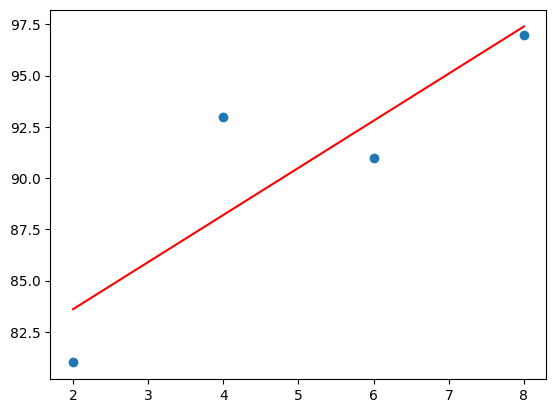

In [56]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, y_pred, "r")
plt.show()

In [57]:
x1 = np.array([2, 4, 6, 8]) # 공부시간
x2 = np.array([0, 4, 2, 3]) # 과외 횟수
y = np.array([81, 93, 91, 97]) # 결과

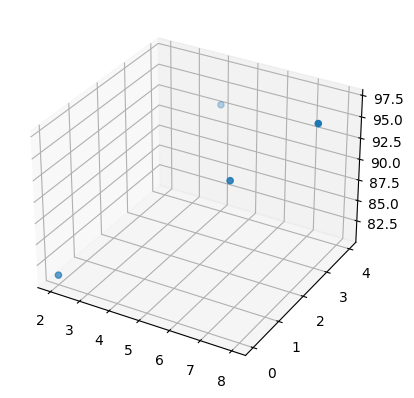

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

In [72]:
a1 = 0
a2 = 0
b = 0
lr = 0.01       #학습률
epochs = 20000 
for i in range(epochs):
    y_pred = a1 * x1 + a2 * x2  + b  # 예측
    error = y - y_pred # 오차
    a1_diff = (2/len(x)) * sum(-x1 * (error)) # a1편미분
    a2_diff = (2/len(x)) * sum(-x2 * (error)) # a2편미분
    b_diff = (2/len(x)) * sum(-(error))     # b편미분
    
    ## 학습률 대입한 기울기와 절편
    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff
    b = b - lr * b_diff
    
    if i % 1000 == 0:
        print(f"epochs={i}, 기울기1 = {a1} , 기울기2 = {a2} , 절편 = {b}")

epochs=0, 기울기1 = 9.28 , 기울기2 = 4.225 , 절편 = 1.81
epochs=1000, 기울기1 = 1.9583182688188616 , 기울기2 = 2.443961213535207 , 절편 = 74.7103314237758
epochs=2000, 기울기1 = 1.5191061638836916 , 기울기2 = 2.2923112117867253 , 절편 = 77.72596001096926
epochs=3000, 기울기1 = 1.5007964890845202 , 기울기2 = 2.285989295372953 , 절편 = 77.85167416621726
epochs=4000, 기울기1 = 1.500033203675304 , 기울기2 = 2.2857257501920656 , 절편 = 77.85691488083864
epochs=5000, 기울기1 = 1.5000013841797435 , 기울기2 = 2.285714763640231 , 절편 = 77.85713335337017
epochs=6000, 기울기1 = 1.500000057703045 , 기울기2 = 2.285714305637841 , 절편 = 77.85714246095398
epochs=7000, 기울기1 = 1.50000000240551 , 기울기2 = 2.285714286544855 , 절편 = 77.85714284062664
epochs=8000, 기울기1 = 1.500000000100283 , 기울기2 = 2.2857142857489103 , 절편 = 77.85714285645432
epochs=9000, 기울기1 = 1.5000000000041855 , 기울기2 = 2.28571428571573 , 절편 = 77.85714285711411
epochs=10000, 기울기1 = 1.5000000000003177 , 기울기2 = 2.285714285714393 , 절편 = 77.85714285714067
epochs=11000, 기울기1 = 1.500000000000318 , 기울기

In [73]:
print("실제점수", y)
print("예측점수", y_pred)

실제점수 [81 93 91 97]
예측점수 [80.85714286 93.         91.42857143 96.71428571]


In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [87]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.compile(optimizer='sgd', loss='mse')
model.fit(x, y, epochs=2000)
# y = 2.3x + 78

1/1 [==============================] - 0s 142ms/step - loss: 9581.1895


In [86]:
hour = 7 ## y = 2.3x + 78
prediction = model.predict([[hour]])
print(f"{hour}시간을 공부하를 한 경우,예상 점수는 {prediction}점입니다")

1/1 [==============================] - 0s 27ms/step
7시간을 공부하를 한 경우,예상 점수는 [[95.12]]점입니다


In [89]:
x = np.array([[2,0], [4,4], [6,2], [8,3]])
y = np.array([81, 93, 91, 97]) 
model = Sequential()
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd', loss='mse')
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 141ms/step - loss: 9374.8848
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 1515.7578
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 957.5926
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 912.9371
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 904.4313
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 898.5024
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 892.7890
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 887.1248
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 881.4976
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 875.9067
Epoch 11/2000
1/1 [==============================] - 0s 3ms/step - loss: 870.3514
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 864.8318
Epoch 13/2000
1/1 [==

Epoch 101/2000
1/1 [==============================] - 0s 4ms/step - loss: 491.1968
Epoch 102/2000
1/1 [==============================] - 0s 3ms/step - loss: 488.0856
Epoch 103/2000
1/1 [==============================] - 0s 3ms/step - loss: 484.9940
Epoch 104/2000
1/1 [==============================] - 0s 2ms/step - loss: 481.9220
Epoch 105/2000
1/1 [==============================] - 0s 4ms/step - loss: 478.8694
Epoch 106/2000
1/1 [==============================] - 0s 3ms/step - loss: 475.8362
Epoch 107/2000
1/1 [==============================] - 0s 3ms/step - loss: 472.8223
Epoch 108/2000
1/1 [==============================] - 0s 2ms/step - loss: 469.8273
Epoch 109/2000
1/1 [==============================] - 0s 3ms/step - loss: 466.8515
Epoch 110/2000
1/1 [==============================] - 0s 3ms/step - loss: 463.8943
Epoch 111/2000
1/1 [==============================] - 0s 3ms/step - loss: 460.9561
Epoch 112/2000
1/1 [==============================] - 0s 2ms/step - loss: 458.0363
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 141.4015
Epoch 298/2000
1/1 [==============================] - 0s 4ms/step - loss: 140.5062
Epoch 299/2000
1/1 [==============================] - 0s 3ms/step - loss: 139.6165
Epoch 300/2000
1/1 [==============================] - 0s 3ms/step - loss: 138.7325
Epoch 301/2000
1/1 [==============================] - 0s 3ms/step - loss: 137.8541
Epoch 302/2000
1/1 [==============================] - 0s 3ms/step - loss: 136.9813
Epoch 303/2000
1/1 [==============================] - 0s 2ms/step - loss: 136.1140
Epoch 304/2000
1/1 [==============================] - 0s 3ms/step - loss: 135.2521
Epoch 305/2000
1/1 [==============================] - 0s 2ms/step - loss: 134.3957
Epoch 306/2000
1/1 [==============================] - 0s 4ms/step - loss: 133.5448
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 132.6993
Epoch 308/2000
1/1 [==============================] - 0s 3ms/step - loss: 131.8590
Epoch 309/2000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 39.9737
Epoch 497/2000
1/1 [==============================] - 0s 3ms/step - loss: 39.7210
Epoch 498/2000
1/1 [==============================] - 0s 3ms/step - loss: 39.4698
Epoch 499/2000
1/1 [==============================] - 0s 2ms/step - loss: 39.2202
Epoch 500/2000
1/1 [==============================] - 0s 3ms/step - loss: 38.9722
Epoch 501/2000
1/1 [==============================] - 0s 4ms/step - loss: 38.7257
Epoch 502/2000
1/1 [==============================] - 0s 3ms/step - loss: 38.4809
Epoch 503/2000
1/1 [==============================] - 0s 2ms/step - loss: 38.2376
Epoch 504/2000
1/1 [==============================] - 0s 2ms/step - loss: 37.9957
Epoch 505/2000
1/1 [==============================] - 0s 3ms/step - loss: 37.7555
Epoch 506/2000
1/1 [==============================] - 0s 3ms/step - loss: 37.5168
Epoch 507/2000
1/1 [==============================] - 0s 3ms/step - loss: 37.2796
Epoch 508/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 21.2062
Epoch 597/2000
1/1 [==============================] - 0s 3ms/step - loss: 21.0724
Epoch 598/2000
1/1 [==============================] - 0s 4ms/step - loss: 20.9393
Epoch 599/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.8071
Epoch 600/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.6757
Epoch 601/2000
1/1 [==============================] - 0s 2ms/step - loss: 20.5452
Epoch 602/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.4155
Epoch 603/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.2866
Epoch 604/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.1586
Epoch 605/2000
1/1 [==============================] - 0s 2ms/step - loss: 20.0313
Epoch 606/2000
1/1 [==============================] - 0s 4ms/step - loss: 19.9049
Epoch 607/2000
1/1 [==============================] - 0s 3ms/step - loss: 19.7793
Epoch 608/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 11.2657
Epoch 697/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.1948
Epoch 698/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.1243
Epoch 699/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0543
Epoch 700/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.9847
Epoch 701/2000
1/1 [==============================] - 0s 4ms/step - loss: 10.9156
Epoch 702/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.8469
Epoch 703/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.7786
Epoch 704/2000
1/1 [==============================] - 0s 4ms/step - loss: 10.7108
Epoch 705/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.6434
Epoch 706/2000
1/1 [==============================] - 0s 2ms/step - loss: 10.5764
Epoch 707/2000
1/1 [==============================] - 0s 2ms/step - loss: 10.5099
Epoch 708/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 5.9630
Epoch 798/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.9257
Epoch 799/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.8886
Epoch 800/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.8517
Epoch 801/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.8151
Epoch 802/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.7787
Epoch 803/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.7426
Epoch 804/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.7067
Epoch 805/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.6710
Epoch 806/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.6355
Epoch 807/2000
1/1 [==============================] - 0s 4ms/step - loss: 5.6002
Epoch 808/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.5652
Epoch 809/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 1.7034
Epoch 1000/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6931
Epoch 1001/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6828
Epoch 1002/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6726
Epoch 1003/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6624
Epoch 1004/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6524
Epoch 1005/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6423
Epoch 1006/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6324
Epoch 1007/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6225
Epoch 1008/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6127
Epoch 1009/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6029
Epoch 1010/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.5932
Epoch 1011/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.9358
Epoch 1100/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9304
Epoch 1101/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9249
Epoch 1102/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9195
Epoch 1103/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.9142
Epoch 1104/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.9088
Epoch 1105/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9035
Epoch 1106/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.8982
Epoch 1107/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8930
Epoch 1108/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.8878
Epoch 1109/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.8826
Epoch 1110/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.8775
Epoch 1111/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.5293
Epoch 1200/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5264
Epoch 1201/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5235
Epoch 1202/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5206
Epoch 1203/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5178
Epoch 1204/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5150
Epoch 1205/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5122
Epoch 1206/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5094
Epoch 1207/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5066
Epoch 1208/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5038
Epoch 1209/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5011
Epoch 1210/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4984
Epoch 1211/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3139
Epoch 1300/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3124
Epoch 1301/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3109
Epoch 1302/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3094
Epoch 1303/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3078
Epoch 1304/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3063
Epoch 1305/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3049
Epoch 1306/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3034
Epoch 1307/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3019
Epoch 1308/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3005
Epoch 1309/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2990
Epoch 1310/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2976
Epoch 1311/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1999
Epoch 1400/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1991
Epoch 1401/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1982
Epoch 1402/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1974
Epoch 1403/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1966
Epoch 1404/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1959
Epoch 1405/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1951
Epoch 1406/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1943
Epoch 1407/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1935
Epoch 1408/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1927
Epoch 1409/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1920
Epoch 1410/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1912
Epoch 1411/2000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.1395
Epoch 1500/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1390
Epoch 1501/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1386
Epoch 1502/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1382
Epoch 1503/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1377
Epoch 1504/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1373
Epoch 1505/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1369
Epoch 1506/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1365
Epoch 1507/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1361
Epoch 1508/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1357
Epoch 1509/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1353
Epoch 1510/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1349
Epoch 1511/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1075
Epoch 1600/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1072
Epoch 1601/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1070
Epoch 1602/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1068
Epoch 1603/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1066
Epoch 1604/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1063
Epoch 1605/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1061
Epoch 1606/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1059
Epoch 1607/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1057
Epoch 1608/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1055
Epoch 1609/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1052
Epoch 1610/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1050
Epoch 1611/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0905
Epoch 1700/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 1701/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0903
Epoch 1702/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0902
Epoch 1703/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0900
Epoch 1704/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0899
Epoch 1705/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0898
Epoch 1706/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0897
Epoch 1707/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0896
Epoch 1708/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0895
Epoch 1709/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0893
Epoch 1710/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0892
Epoch 1711/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0815
Epoch 1800/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0815
Epoch 1801/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0814
Epoch 1802/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 1803/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 1804/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0812
Epoch 1805/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0812
Epoch 1806/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0811
Epoch 1807/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0810
Epoch 1808/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0810
Epoch 1809/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0809
Epoch 1810/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0809
Epoch 1811/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0768
Epoch 1900/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0768
Epoch 1901/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0767
Epoch 1902/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 1903/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0766
Epoch 1904/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 1905/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 1906/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 1907/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0765
Epoch 1908/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 1909/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 1910/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 1911/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0743
Epoch 2000/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0742


In [94]:
hour = 7 ## y = 1.5*x1 + 2.28*x2 + 77.85
private_class = 4
prediction = model.predict([[hour,private_class]])
print(f"{hour}시간을 공부하고 {private_class}시간의 과외를 받을 경우,"+\
      f"예상 점수는 {prediction}점입니다")
#기울기1 = 1.5000000000003177 , 기울기2 = 2.285714285714393 , 절편 = 77.85714285714067

1/1 [==============================] - 0s 28ms/step
2시간을 공부하고 6시간의 과외를 받을 경우,예상 점수는 [[94.51798]]점입니다


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
#교차 엔트로피 오차 함수
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(x, y, epochs=5000)

In [10]:
hour = 24
prediction = model.predict([[hour]]) * 100
print(f"{hour}시간을 공부하를 한 경우,예상 점수는 {prediction}%입니다")

1/1 [==============================] - 0s 28ms/step
24시간을 공부하를 한 경우,예상 점수는 [[99.99809]]%입니다


In [14]:
x = np.array([[2,0], [4,4], [6,2], [8,3], [10,2], [12,3], [14,4]])
y = np.array([0, 0, 0, 1, 1, 1, 1])
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#교차 엔트로피 오차 함수
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(x, y, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 175ms/step - loss: 1.3018
Epoch 2/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.2734
Epoch 3/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.2456
Epoch 4/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.2183
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.1916
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1655
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1400
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1150
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0906
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0667
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0435
Epoch 12/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0207
Epoch 13/5000
1/1 [============================

1/1 [==============================] - 0s 3ms/step - loss: 0.4315
Epoch 104/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4313
Epoch 105/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4311
Epoch 106/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4310
Epoch 107/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4308
Epoch 108/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4307
Epoch 109/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4305
Epoch 110/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4304
Epoch 111/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4302
Epoch 112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4301
Epoch 113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4299
Epoch 114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4297
Epoch 115/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4163
Epoch 205/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4161
Epoch 206/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4160
Epoch 207/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4158
Epoch 208/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4157
Epoch 209/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4155
Epoch 210/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4154
Epoch 211/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4152
Epoch 212/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4151
Epoch 213/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4149
Epoch 214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4148
Epoch 215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4147
Epoch 216/5000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.4020
Epoch 306/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4019
Epoch 307/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4018
Epoch 308/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4016
Epoch 309/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4015
Epoch 310/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4013
Epoch 311/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4012
Epoch 312/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4011
Epoch 313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4009
Epoch 314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4008
Epoch 315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4007
Epoch 316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4005
Epoch 317/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3887
Epoch 407/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3886
Epoch 408/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3885
Epoch 409/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3883
Epoch 410/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3882
Epoch 411/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3881
Epoch 412/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3880
Epoch 413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3878
Epoch 414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3877
Epoch 415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3876
Epoch 416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3874
Epoch 417/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3873
Epoch 418/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3763
Epoch 508/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3762
Epoch 509/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3760
Epoch 510/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3759
Epoch 511/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3758
Epoch 512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3757
Epoch 513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3756
Epoch 514/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3754
Epoch 515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3753
Epoch 516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3752
Epoch 517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3751
Epoch 518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3750
Epoch 519/5000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.3647
Epoch 609/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3646
Epoch 610/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3644
Epoch 611/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3643
Epoch 612/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3642
Epoch 613/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3641
Epoch 614/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3640
Epoch 615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3639
Epoch 616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3638
Epoch 617/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3637
Epoch 618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3636
Epoch 619/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3634
Epoch 620/5000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.3538
Epoch 710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3537
Epoch 711/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3536
Epoch 712/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3535
Epoch 713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3534
Epoch 714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3533
Epoch 715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3532
Epoch 716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3531
Epoch 717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3530
Epoch 718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3529
Epoch 719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3528
Epoch 720/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3527
Epoch 721/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.3437
Epoch 811/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3436
Epoch 812/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3435
Epoch 813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3434
Epoch 814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3433
Epoch 815/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3432
Epoch 816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3431
Epoch 817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3430
Epoch 818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3429
Epoch 819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3428
Epoch 820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3427
Epoch 821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3426
Epoch 822/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.3342
Epoch 912/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3341
Epoch 913/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3340
Epoch 914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3339
Epoch 915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3338
Epoch 916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3338
Epoch 917/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3337
Epoch 918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3336
Epoch 919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3335
Epoch 920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3334
Epoch 921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3333
Epoch 922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3332
Epoch 923/5000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.3253
Epoch 1013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3253
Epoch 1014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3252
Epoch 1015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3251
Epoch 1016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3250
Epoch 1017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3249
Epoch 1018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3248
Epoch 1019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3247
Epoch 1020/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3247
Epoch 1021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3246
Epoch 1022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3245
Epoch 1023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3244
Epoch 1024/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.3171
Epoch 1113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3170
Epoch 1114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3170
Epoch 1115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3169
Epoch 1116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3168
Epoch 1117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3167
Epoch 1118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3166
Epoch 1119/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3166
Epoch 1120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3165
Epoch 1121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3164
Epoch 1122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3163
Epoch 1123/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3163
Epoch 1124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3094
Epoch 1213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3093
Epoch 1214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3093
Epoch 1215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3092
Epoch 1216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3091
Epoch 1217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3090
Epoch 1218/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3090
Epoch 1219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3089
Epoch 1220/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3088
Epoch 1221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3088
Epoch 1222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3087
Epoch 1223/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3086
Epoch 1224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3022
Epoch 1313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3021
Epoch 1314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3020
Epoch 1315/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3020
Epoch 1316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3019
Epoch 1317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 1318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3018
Epoch 1319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3017
Epoch 1320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3016
Epoch 1321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3016
Epoch 1322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3015
Epoch 1323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3014
Epoch 1324/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2954
Epoch 1413/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2953
Epoch 1414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2953
Epoch 1415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2952
Epoch 1416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2951
Epoch 1417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2951
Epoch 1418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2950
Epoch 1419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2949
Epoch 1420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2949
Epoch 1421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2948
Epoch 1422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2947
Epoch 1423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2947
Epoch 1424/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.2890
Epoch 1513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2889
Epoch 1514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2889
Epoch 1515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2888
Epoch 1516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2887
Epoch 1517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2887
Epoch 1518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 1519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 1520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2885
Epoch 1521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2884
Epoch 1522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2884
Epoch 1523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2883
Epoch 1524/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2830
Epoch 1613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2829
Epoch 1614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2829
Epoch 1615/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2828
Epoch 1616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2827
Epoch 1617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2827
Epoch 1618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2826
Epoch 1619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2826
Epoch 1620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2825
Epoch 1621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2824
Epoch 1622/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2824
Epoch 1623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2823
Epoch 1624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2773
Epoch 1713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2772
Epoch 1714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2772
Epoch 1715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2771
Epoch 1716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2771
Epoch 1717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2770
Epoch 1718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2770
Epoch 1719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2769
Epoch 1720/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2768
Epoch 1721/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2768
Epoch 1722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2767
Epoch 1723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2767
Epoch 1724/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.2719
Epoch 1813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2719
Epoch 1814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2718
Epoch 1815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2718
Epoch 1816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2717
Epoch 1817/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2717
Epoch 1818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2716
Epoch 1819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2716
Epoch 1820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2715
Epoch 1821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2714
Epoch 1822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2714
Epoch 1823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2713
Epoch 1824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2668
Epoch 1913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2668
Epoch 1914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2667
Epoch 1915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2667
Epoch 1916/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2666
Epoch 1917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2666
Epoch 1918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2665
Epoch 1919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2665
Epoch 1920/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2664
Epoch 1921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2664
Epoch 1922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2663
Epoch 1923/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2663
Epoch 1924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2620
Epoch 2013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2620
Epoch 2014/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2619
Epoch 2015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2619
Epoch 2016/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2618
Epoch 2017/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2618
Epoch 2018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 2019/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2617
Epoch 2020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 2021/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2616
Epoch 2022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2616
Epoch 2023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2615
Epoch 2024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2575
Epoch 2113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2574
Epoch 2114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2574
Epoch 2115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2573
Epoch 2116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2573
Epoch 2117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2572
Epoch 2118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2572
Epoch 2119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2572
Epoch 2120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2571
Epoch 2121/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2571
Epoch 2122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2570
Epoch 2123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2570
Epoch 2124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2531
Epoch 2213/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2531
Epoch 2214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2531
Epoch 2215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2530
Epoch 2216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2530
Epoch 2217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2529
Epoch 2218/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2529
Epoch 2219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2528
Epoch 2220/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2528
Epoch 2221/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2528
Epoch 2222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2527
Epoch 2223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2527
Epoch 2224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2490
Epoch 2313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2490
Epoch 2314/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2489
Epoch 2315/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2489
Epoch 2316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2489
Epoch 2317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2488
Epoch 2318/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2488
Epoch 2319/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2487
Epoch 2320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 2321/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2487
Epoch 2322/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2486
Epoch 2323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2486
Epoch 2324/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2451
Epoch 2413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2451
Epoch 2414/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2450
Epoch 2415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2450
Epoch 2416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2450
Epoch 2417/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2449
Epoch 2418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2449
Epoch 2419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2448
Epoch 2420/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2448
Epoch 2421/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2448
Epoch 2422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2447
Epoch 2423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2447
Epoch 2424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2414
Epoch 2513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2414
Epoch 2514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2413
Epoch 2515/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2413
Epoch 2516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2412
Epoch 2517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2412
Epoch 2518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2412
Epoch 2519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2411
Epoch 2520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2411
Epoch 2521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2411
Epoch 2522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2410
Epoch 2523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2410
Epoch 2524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2378
Epoch 2613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2378
Epoch 2614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2378
Epoch 2615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2377
Epoch 2616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2377
Epoch 2617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2377
Epoch 2618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2376
Epoch 2619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2376
Epoch 2620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2376
Epoch 2621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2375
Epoch 2622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2375
Epoch 2623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2375
Epoch 2624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2344
Epoch 2713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2344
Epoch 2714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2344
Epoch 2715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2343
Epoch 2716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2343
Epoch 2717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2343
Epoch 2718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2342
Epoch 2719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2342
Epoch 2720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2342
Epoch 2721/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2341
Epoch 2722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2341
Epoch 2723/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2341
Epoch 2724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2312
Epoch 2813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2312
Epoch 2814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2311
Epoch 2815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2311
Epoch 2816/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2311
Epoch 2817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2310
Epoch 2818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2310
Epoch 2819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2310
Epoch 2820/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2309
Epoch 2821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2309
Epoch 2822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2309
Epoch 2823/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2308
Epoch 2824/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.2281
Epoch 2913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2281
Epoch 2914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2280
Epoch 2915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2280
Epoch 2916/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2280
Epoch 2917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2279
Epoch 2918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2279
Epoch 2919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2279
Epoch 2920/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2278
Epoch 2921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2278
Epoch 2922/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2278
Epoch 2923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2278
Epoch 2924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2251
Epoch 3013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2251
Epoch 3014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2251
Epoch 3015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2250
Epoch 3016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2250
Epoch 3017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2250
Epoch 3018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2249
Epoch 3019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2249
Epoch 3020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2249
Epoch 3021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2249
Epoch 3022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2248
Epoch 3023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2248
Epoch 3024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2223
Epoch 3113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2222
Epoch 3114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2222
Epoch 3115/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2222
Epoch 3116/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2222
Epoch 3117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2221
Epoch 3118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2221
Epoch 3119/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2221
Epoch 3120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2220
Epoch 3121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2220
Epoch 3122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2220
Epoch 3123/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2220
Epoch 3124/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.2195
Epoch 3213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2195
Epoch 3214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2195
Epoch 3215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2195
Epoch 3216/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2194
Epoch 3217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2194
Epoch 3218/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2194
Epoch 3219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2193
Epoch 3220/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2193
Epoch 3221/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2193
Epoch 3222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2193
Epoch 3223/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2192
Epoch 3224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2169
Epoch 3313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2169
Epoch 3314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2169
Epoch 3315/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2168
Epoch 3316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2168
Epoch 3317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2168
Epoch 3318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2168
Epoch 3319/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2167
Epoch 3320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2167
Epoch 3321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2167
Epoch 3322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2167
Epoch 3323/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2166
Epoch 3324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2144
Epoch 3413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2144
Epoch 3414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2143
Epoch 3415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2143
Epoch 3416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2143
Epoch 3417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2143
Epoch 3418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2142
Epoch 3419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2142
Epoch 3420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2142
Epoch 3421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2142
Epoch 3422/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2141
Epoch 3423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2141
Epoch 3424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2120
Epoch 3513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2119
Epoch 3514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2119
Epoch 3515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2119
Epoch 3516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2119
Epoch 3517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2118
Epoch 3518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2118
Epoch 3519/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2118
Epoch 3520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2118
Epoch 3521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2117
Epoch 3522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2117
Epoch 3523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2117
Epoch 3524/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2096
Epoch 3613/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2096
Epoch 3614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2096
Epoch 3615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2096
Epoch 3616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2095
Epoch 3617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2095
Epoch 3618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2095
Epoch 3619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2095
Epoch 3620/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2094
Epoch 3621/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2094
Epoch 3622/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2094
Epoch 3623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2094
Epoch 3624/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.2074
Epoch 3713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2073
Epoch 3714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2073
Epoch 3715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2073
Epoch 3716/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2073
Epoch 3717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2073
Epoch 3718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2072
Epoch 3719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2072
Epoch 3720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2072
Epoch 3721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2072
Epoch 3722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2071
Epoch 3723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2071
Epoch 3724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2052
Epoch 3813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2052
Epoch 3814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2052
Epoch 3815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2051
Epoch 3816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2051
Epoch 3817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2051
Epoch 3818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2051
Epoch 3819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2050
Epoch 3820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2050
Epoch 3821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2050
Epoch 3822/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2050
Epoch 3823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2050
Epoch 3824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2031
Epoch 3913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2031
Epoch 3914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2031
Epoch 3915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2030
Epoch 3916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2030
Epoch 3917/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2030
Epoch 3918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2030
Epoch 3919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2030
Epoch 3920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2029
Epoch 3921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2029
Epoch 3922/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2029
Epoch 3923/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2029
Epoch 3924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2011
Epoch 4013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2011
Epoch 4014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2010
Epoch 4015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2010
Epoch 4016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2010
Epoch 4017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2010
Epoch 4018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2010
Epoch 4019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2009
Epoch 4020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2009
Epoch 4021/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2009
Epoch 4022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2009
Epoch 4023/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2009
Epoch 4024/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.1991
Epoch 4113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1991
Epoch 4114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1991
Epoch 4115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1991
Epoch 4116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1990
Epoch 4117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1990
Epoch 4118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1990
Epoch 4119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1990
Epoch 4120/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1990
Epoch 4121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1989
Epoch 4122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1989
Epoch 4123/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1989
Epoch 4124/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1972
Epoch 4213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1972
Epoch 4214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1972
Epoch 4215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1972
Epoch 4216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1972
Epoch 4217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1971
Epoch 4218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1971
Epoch 4219/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1971
Epoch 4220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1971
Epoch 4221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1971
Epoch 4222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1970
Epoch 4223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1970
Epoch 4224/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1954
Epoch 4313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1954
Epoch 4314/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1954
Epoch 4315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1953
Epoch 4316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1953
Epoch 4317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1953
Epoch 4318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1953
Epoch 4319/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1953
Epoch 4320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1953
Epoch 4321/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1952
Epoch 4322/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1952
Epoch 4323/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1952
Epoch 4324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1936
Epoch 4413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1936
Epoch 4414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1936
Epoch 4415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1936
Epoch 4416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1936
Epoch 4417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1935
Epoch 4418/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1935
Epoch 4419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1935
Epoch 4420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 4421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1935
Epoch 4422/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1935
Epoch 4423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1934
Epoch 4424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1919
Epoch 4513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1919
Epoch 4514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1919
Epoch 4515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1919
Epoch 4516/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1918
Epoch 4517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1918
Epoch 4518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1918
Epoch 4519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1918
Epoch 4520/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1918
Epoch 4521/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1918
Epoch 4522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1917
Epoch 4523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1917
Epoch 4524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 4613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 4614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 4615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 4616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 4617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1902
Epoch 4618/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1901
Epoch 4619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1901
Epoch 4620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1901
Epoch 4621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1901
Epoch 4622/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1901
Epoch 4623/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1901
Epoch 4624/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.1886
Epoch 4713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1886
Epoch 4714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1886
Epoch 4715/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1886
Epoch 4716/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1886
Epoch 4717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1885
Epoch 4718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1885
Epoch 4719/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1885
Epoch 4720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1885
Epoch 4721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1885
Epoch 4722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1885
Epoch 4723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1885
Epoch 4724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1871
Epoch 4813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1870
Epoch 4814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1870
Epoch 4815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1870
Epoch 4816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1870
Epoch 4817/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1870
Epoch 4818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1870
Epoch 4819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1869
Epoch 4820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1869
Epoch 4821/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1869
Epoch 4822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1869
Epoch 4823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1869
Epoch 4824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1855
Epoch 4913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1855
Epoch 4914/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1855
Epoch 4915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1855
Epoch 4916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1855
Epoch 4917/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1855
Epoch 4918/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1854
Epoch 4919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1854
Epoch 4920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1854
Epoch 4921/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1854
Epoch 4922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1854
Epoch 4923/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1854
Epoch 4924/5000
1/1 [===========

In [15]:
hour = 7 
private_class = 0
prediction = model.predict([[hour,private_class]]) * 100
print(f"{hour}시간을 공부하고 {private_class}시간의 과외를 받을 경우,"+\
      f"예상 점수는 {prediction}%입니다")

1/1 [==============================] - 0s 41ms/step
7시간을 공부하고 0시간의 과외를 받을 경우,예상 점수는 [[89.52616]]%입니다
